In [4]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [5]:
digits_data=load_digits()
digits_data.data.shape

(1797, 64)

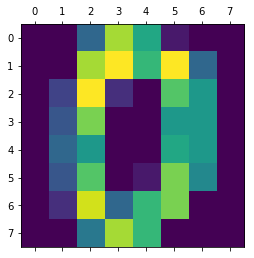

In [8]:
plt.matshow(digits_data.images[0])

In [12]:
plt.gray()

<Figure size 432x288 with 0 Axes>

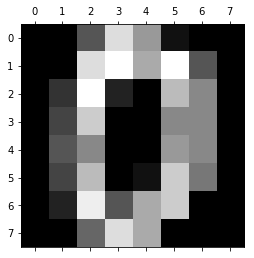

In [13]:
plt.matshow(digits_data.images[0])

In [14]:
digits_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
images=list(zip(digits_data.images,digits_data.target))

In [16]:
plt.figure(figsize=(4,4))

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

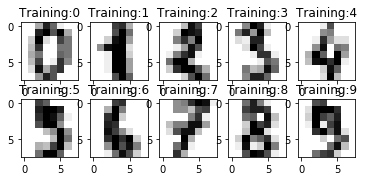

In [19]:
for i ,(image,label) in enumerate(images[:10]):
    plt.subplot(3,5,i+1)
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title("Training:%i" %label)
plt.show()

In [21]:
img_samples=len(digits_data.images)
img_samples

1797

In [22]:
img=digits_data.images.reshape(img_samples,-1)
img

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
labels=digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [25]:
from sklearn import svm
classify=svm.SVC(gamma=0.001)
classify

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
img_half=img[:img_samples//2]
labels_half=labels[:img_samples//2]
classify.fit(img_half,labels_half)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
labels_expected=digits_data.target[img_samples//2:]
img_predicted=classify.predict(img[img_samples//2:])

In [29]:
images_predictions=list(zip(digits_data.images[img_samples//2:],img_predicted))

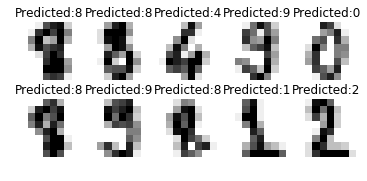

In [30]:
for i ,(image,predict) in enumerate(images_predictions[:10]):
    plt.subplot(3,5,i+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title("Predicted:%i" %predict)
plt.show()

In [32]:
from sklearn import metrics

In [34]:
print("Classificatin Report %s:\n%s\n" %(classify,metrics.classification_report(labels_expected,img_predicted)))

Classificatin Report SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       

In [35]:
print("Confusion matrix:\n%s" %metrics.confusion_matrix(labels_expected,img_predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
